In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [10]:
np.random.seed(0)

In [11]:
n_pts=500

#Prepare dummy data
X,Y = datasets.make_circles(n_samples=n_pts, random_state=123,noise=0.1,factor=0.2)

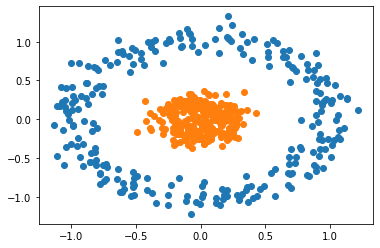

In [12]:
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])

In [18]:
model = Sequential()

#Specify the hidden layers
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))

#Specify the output layer
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(Adam(lr=0.01),'binary_crossentropy',metrics=['accuracy'])


In [19]:
h=model.fit(x=X,y=Y,verbose=1, batch_size=20,epochs=100, shuffle='true')

Epoch 1/100
25/25 [==============================] - 0s 939us/step - loss: 0.6968 - accuracy: 0.5380
Epoch 2/100
25/25 [==============================] - 0s 909us/step - loss: 0.6953 - accuracy: 0.5380
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5780
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.6140
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.4200
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6340
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.6560
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.6500
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.7100
Epoch

25/25 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 83/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 1.0000
Epoch 84/100
25/25 [==============================] - 0s 983us/step - loss: 0.0368 - accuracy: 1.0000
Epoch 85/100
25/25 [==============================] - 0s 980us/step - loss: 0.0357 - accuracy: 1.0000
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 1.0000
Epoch 87/100
25/25 [==============================] - 0s 987us/step - loss: 0.0337 - accuracy: 1.0000
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 1.0000
Epoch 89/100
25/25 [==============================] - 0s 944us/step - loss: 0.0318 - accuracy: 1.0000
Epoch 90/100
25/25 [==============================] - 0s 975us/step - loss: 0.0310 - accuracy: 1.0000
Epoch 91/100
25/25 [==============================] - 0s 979us/step - loss: 0.0301 - accuracy: 1.0000
E

Text(0.5, 1.0, 'Accuracy')

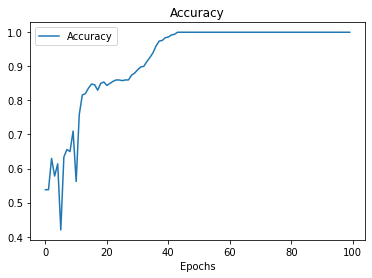

In [20]:
plt.plot(h.history['accuracy'])
plt.xlabel('Epochs')
plt.legend(['Accuracy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

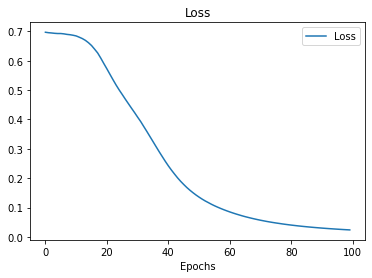

In [21]:
plt.plot(h.history['loss'])
plt.xlabel('Epochs')
plt.legend(['Loss'])
plt.title('Loss')

In [22]:
def plot_decision_boundary(X,Y, model):
    x_span=np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25)
    y_span=np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25)
    xx,yy=np.meshgrid(x_span,y_span)
    
    xx_,yy_=xx.ravel(),yy.ravel()
    
    grid=np.c_[xx_,yy_]
    
    pred_func=model.predict(grid)
    z=pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:n_pts,0], X[:n_pts,1])
    plt.scatter(X[n_pts:,0], X[n_pts:,1])

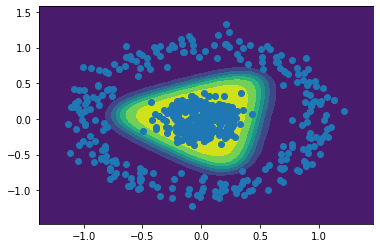

In [23]:
plot_decision_boundary(X,Y,model)

Prediction is : [[0.9875746]]


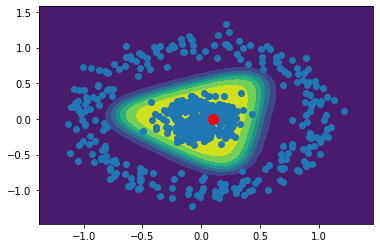

In [27]:
#Lets predict some new data
plot_decision_boundary(X,Y,model)
x=0.1
y=0.0
point=np.array([[x,y]])
pred=model.predict(point)

plt.plot([x],[y],marker='o',markersize=10,color="red")
print("Prediction is :",pred)